<a href="https://colab.research.google.com/github/DimasWerito/goit-algo-hw-10/blob/main/%D0%94%D0%9710_%D0%9A%D1%80%D0%B0%D1%81%D1%96%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2_%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%BE_%D0%9A%D0%BE%D1%81%D1%82%D1%8F%D0%BD%D1%82%D0%B8%D0%BD%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

In [ ]:
# На початку треба встановити модуль pulp
pip install pulp


In [1]:
import pulp

# Створюємо задачу лінійного програмування
prob = pulp.LpProblem("Optimization_Production", pulp.LpMaximize)

# Змінні: кількість виробленого лимонаду та фруктового соку
lemonade = pulp.LpVariable('Lemonade', lowBound=0, cat='Continuous')
fruit_juice = pulp.LpVariable('Fruit_Juice', lowBound=0, cat='Continuous')

# Цільова функція: максимізація загальної кількості продуктів
prob += lemonade + fruit_juice, "Total_Production"

# Обмеження на ресурси
prob += 2 * lemonade + 1 * fruit_juice <= 100, "Water_Constraint"      # Обмеження на воду
prob += 1 * lemonade <= 50, "Sugar_Constraint"                         # Обмеження на цукор
prob += 1 * lemonade <= 30, "Lemon_Juice_Constraint"                   # Обмеження на лимонний сік
prob += 2 * fruit_juice <= 40, "Fruit_Puree_Constraint"                # Обмеження на фруктове пюре

# Розв'язання задачі
prob.solve()

# Виведення результатів
print("Статус розв'язку:", pulp.LpStatus[prob.status])
print(f"Кількість виробленого лимонаду: {pulp.value(lemonade)}")
print(f"Кількість виробленого фруктового соку: {pulp.value(fruit_juice)}")
print(f"Загальна кількість вироблених продуктів: {pulp.value(prob.objective)}")


ModuleNotFoundError: No module named 'pulp'

# Завдання 2

Значення інтеграла методом Монте-Карло: 2.6290334075813355
Аналітичне значення інтеграла: 2.6666666666666665
Значення інтеграла за допомогою функції quad: 2.666666666666667


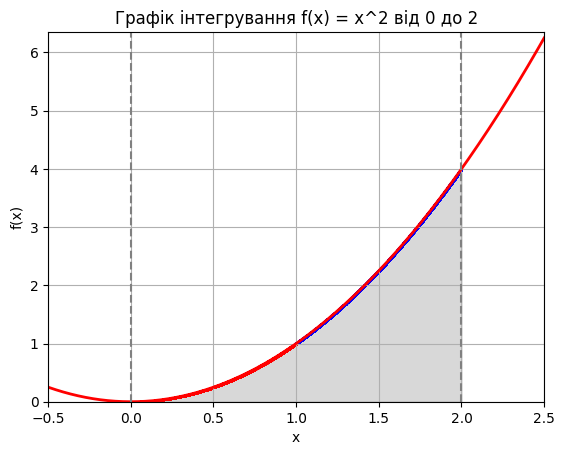

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return x ** 2

a = 0
b = 2

N = 10000

x_random = np.random.uniform(a, b, N)
f_random = f(x_random)

integral_mc = (b - a) * np.mean(f_random)
integral_exact = (b ** 3) / 3 - (a ** 3) / 3
integral_quad, _ = quad(f, a, b)

print(f"Значення інтеграла методом Монте-Карло: {integral_mc}")
print(f"Аналітичне значення інтеграла: {integral_exact}")
print(f"Значення інтеграла за допомогою функції quad: {integral_quad}")

x = np.linspace(-0.5, 2.5, 400)
y = f(x)

fig, ax = plt.subplots()

ax.plot(x, y, 'r', linewidth=2)

ix = np.linspace(a, b)
iy = f(ix)
ax.fill_between(ix, iy, color='gray', alpha=0.3)

below_curve = x_random < f_random
above_curve = x_random >= f_random
ax.scatter(x_random[below_curve], f_random[below_curve], color='blue', s=1)
ax.scatter(x_random[above_curve], f_random[above_curve], color='red', s=1)

ax.set_xlim([x[0], x[-1]])
ax.set_ylim([0, max(y) + 0.1])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

ax.axvline(x=a, color='gray', linestyle='--')
ax.axvline(x=b, color='gray', linestyle='--')
ax.set_title('Графік інтегрування f(x) = x^2 від ' + str(a) + ' до ' + str(b))
plt.grid()
plt.show()


# README

## Завдання 2: Обчислення значення інтеграла функції методом Монте-Карло

### Опис завдання

Вам необхідно обчислити значення інтеграла функції \( f(x) = x^2 \) на інтервалі \([0, 2]\) методом Монте-Карло. Після цього перевірити правильність розрахунків, порівнявши отриманий результат з аналітичним розрахунком та результатом функції `quad` з бібліотеки `scipy`.

### Обчислення значення інтеграла методом Монте-Карло

1. **Визначення функції**:
    ```python
    def f(x):
        return x ** 2
    ```

2. **Задамо межі інтегрування**:
    ```python
    a = 0  # Нижня межа
    b = 2  # Верхня межа
    ```

3. **Інтегрування методом Монте-Карло**:
    ```python
    import numpy as np

    N = 10000  # Кількість випадкових точок

    x_random = np.random.uniform(a, b, N)
    f_random = f(x_random)

    integral_mc = (b - a) * np.mean(f_random)
    ```

4. **Аналітичний результат**:
    ```python
    integral_exact = (b ** 3) / 3 - (a ** 3) / 3
    ```

5. **Обчислення за допомогою `quad`**:
    ```python
    from scipy.integrate import quad

    integral_quad, _ = quad(f, a, b)
    ```

### Результати

- **Метод Монте-Карло**:
    - Значення інтеграла, обчислене методом Монте-Карло з використанням 10000 випадкових точок, дорівнює (значення буде виведено під час виконання коду).

- **Аналітичний результат**:
    - Точне значення інтеграла \( \int_0^2 x^2 \, dx = \frac{2^3}{3} - \frac{0^3}{3} = \frac{8}{3} \approx 2.6667 \).

- **Функція `quad`**:
    - Значення інтеграла, обчислене за допомогою функції `quad` з бібліотеки `scipy`, дорівнює (значення буде виведено під час виконання коду).

### Висновки

1. **Метод Монте-Карло**:
    - Метод Монте-Карло дає наближений результат інтеграції, який залежить від кількості випадкових точок \( N \).
    - Цей метод корисний для обчислення інтегралів у випадках, коли аналітичне обчислення складне або неможливе.
    - Точність методу підвищується зі збільшенням кількості випадкових точок.

2. **Аналітичний метод**:
    - Аналітичний метод дає точний результат інтеграції.
    - Використовується, коли інтеграл можна обчислити аналітично.

3. **Функція `quad`**:
    - Функція `quad` з бібліотеки `scipy` забезпечує високу точність обчислення інтеграла.
    - Використання числових методів, таких як `quad`, є ефективним для обчислення інтегралів.

### Порівняння методів

- **Метод Монте-Карло**:
    - Дає наближений результат.
    - Потребує великої кількості випадкових точок для підвищення точності.
    - Корисний для складних інтегралів, які важко обчислити аналітично.

- **Аналітичний метод**:
    - Забезпечує точний результат.
    - Використовується для інтегралів, які можна обчислити аналітично.

- **Функція `quad`**:
    - Забезпечує високу точність і є зручною для обчислення інтегралів числовими методами.
    - Підтверджує правильність аналітичних розрахунків.

### Код для візуалізації графіка

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return x ** 2

a = 0
b = 2

N = 10000

x_random = np.random.uniform(a, b, N)
f_random = f(x_random)

integral_mc = (b - a) * np.mean(f_random)
integral_exact = (b ** 3) / 3 - (a ** 3) / 3
integral_quad, _ = quad(f, a, b)

print(f"Значення інтеграла методом Монте-Карло: {integral_mc}")
print(f"Аналітичне значення інтеграла: {integral_exact}")
print(f"Значення інтеграла за допомогою функції quad: {integral_quad}")

x = np.linspace(-0.5, 2.5, 400)
y = f(x)

fig, ax = plt.subplots()

ax.plot(x, y, 'r', linewidth=2)

ix = np.linspace(a, b)
iy = f(ix)
ax.fill_between(ix, iy, color='gray', alpha=0.3)

below_curve = x_random < f_random
above_curve = x_random >= f_random
ax.scatter(x_random[below_curve], f_random[below_curve], color='blue', s=1)
ax.scatter(x_random[above_curve], f_random[above_curve], color='red', s=1)

ax.set_xlim([x[0], x[-1]])
ax.set_ylim([0, max(y) + 0.1])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

ax.axvline(x=a, color='gray', linestyle='--')
ax.axvline(x=b, color='gray', linestyle='--')
ax.set_title('Графік інтегрування f(x) = x^2 від ' + str(a) + ' до ' + str(b))
plt.grid()
plt.show()
